# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Overview
>This data set contains information about `10,000` movies collected from `The Movie Database (TMDb)`, including `user ratings` and `revenue`.

### Dataset Description 
>`It consists of 21 columns:` 

- **id:** an identifier of the movie

- **imdb_id:** the imdb identifier of the movie

- **popularity:** the popularity of the movie

- **budget:** the budget in which the movie was made

- **revenue:** the revenue generated by the movie

- **original_title:** the movie title in the original language

- **cast:** the actors who participated in the movie

- **homepage:** a link to the home page of the mavie if available

- **director:** the director of the movie

- **tagline:** the tagline of the movie (a line gives an insight of the mevie theme)

- **keywords:** the keywords related to the movie

- **overview:** a brief description of the movie

- **runtime:** the total running time of the movie in minutes

- **genres:** the genre the movie belongs to (action, comedy, etc..)

- **production_companies:** the producing company of the movie

- **release_date:** the date which the movie first released

- **vote_count:** count of recieved ratings

- **vote_average:** average of recieved ratings

- **release_year:** the year which the movie released

- **budget_adj:** the budget associated movie in terms of 2010 dollars.

- **revenue_adj:** the revenue associated movie in terms of 2010 dollars.
       
>`And about 10,000 record`

### Question(s) for Analysis
- What are the movies with the longest and shortest runtime?
- What are the movies with the least and the most earned revenue, and how aften a movie can fail or succeed?
- What kinds of properties are associated with movies that have high revenues?
- How did the amount of produced films changed over time?

First, We're going to import the packages that will be used which are: [Numpy - Pandas - Matplotlib - Seaborn]

In [1]:
# importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# this line to make the viualizations inline in the same notebook, not in a seperate window
%matplotlib inline     

# Making the visualization's background dark, and with a grid to make it more comfortable for the eye
sns.set_style('darkgrid') 

<a id='wrangling'></a>
## Data Wrangling

> Let's now load the dataset which in the form of a CSV file in a pandas DataFrame

In [2]:
# loading the csv file into a pandas Dataframe
df_tmdb = pd.read_csv('Database_TMDb_movie_data.csv')

# viweing the first 5 rows to get a first look
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### First impression
> First, from the description of the dataset columns, there are some columns that's not going to be usful in answaring the questions we have

> Also there are some columns that have multiple-value cells seperated by '|'

> Let's do some more check to get more information about the data propeties

In [3]:
# exploring more information about the dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>The dataset seems to have a lot of missing values

In [4]:
type(df_tmdb['release_date'][0])

str

> The datatype of `release_date` column is stored as `str`, so it need to be converted to a proper date type

In [5]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The columns `budget`, `revenue`, `budget_adj`, `revenue_adj` have 0-value in more the 50% of the records

> The `runtime` columns also has a lot of 0-values records

### Observations
> So to sum up all the observations we gathered so far
1. There are some columns that is not seems usefull for the analysis (eg: id, imdb_id, homepage, etc)
2. The datatype of `release_date` column is stored as `str`, so it need to be converted to a proper date type
3. The columns `budget`, `revenue`, `budget_adj`, `revenue_adj` have 0-value in more the 50% of the records. also `runtime`
4. There are some columns that have multiple-value cells seperated by '|'

### Data Cleaning

In [6]:
df_tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> 1. Removing the unwaned columns

> columns: ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','vote_count']

In [7]:
# list of the unwanted columns names
cols = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 
        'production_companies','vote_count']

# dropping the unwanted columns
df_tmdb = df_tmdb.drop(cols, axis=1)
df_tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


> 2. Converting the `release_date` column to a proper `date` type

> I will use the medthod from pandas `pd.to_datetime` which convert a string date to a standard date format

In [8]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09


> 3. Dealing with 0-values and missing values

> For those I have to drop them because they will ruin the results of the analysis because it's false data (eg. having a 0-lenght movie `runtime = 0`

> To be able to drop them, I will use the `dropna` method which drop the (row or column) that contain the `NAN` values, and to do that, First I will have to convert the `0` to `NAN`

In [9]:
# For the 0-value, first specifying the columns
cols = ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime']

# Replacing the `0` with `NAN`
df_tmdb[cols] = df_tmdb[cols].replace(0, np.NAN)

# Now, droping the NAN rows
df_tmdb.dropna(subset = cols, inplace = True)

In [10]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3855 non-null   float64       
 1   budget          3855 non-null   float64       
 2   revenue         3855 non-null   float64       
 3   original_title  3855 non-null   object        
 4   runtime         3855 non-null   float64       
 5   genres          3855 non-null   object        
 6   release_date    3855 non-null   datetime64[ns]
 7   vote_average    3855 non-null   float64       
 8   release_year    3855 non-null   int64         
 9   budget_adj      3855 non-null   float64       
 10  revenue_adj     3855 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 361.4+ KB


> Let's also check if there is duplicates records

In [11]:
sum(df_tmdb.duplicated())

1

> There is 1 row. let's drop it

In [12]:
df_tmdb.drop_duplicates(inplace = True)
df_tmdb.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   budget          3854 non-null   float64       
 2   revenue         3854 non-null   float64       
 3   original_title  3854 non-null   object        
 4   runtime         3854 non-null   float64       
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   vote_average    3854 non-null   float64       
 8   release_year    3854 non-null   int64         
 9   budget_adj      3854 non-null   float64       
 10  revenue_adj     3854 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 361.3+ KB


> Now, we have to update the indexes after we droped rows from the dataframe

In [13]:
df_tmdb.reset_index(drop=True, inplace=True)

> 4. There are some columns that have multiple-value cells seperated by '|'

In [14]:
df_tmdb.head(3)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08


> So, among the current columns, the one who has '|' seperated values is `genres`

> To fix that, I am going to split that column to multiple columns and then append the new columns to the dataframe and delete the old column `genres`

> first, splitting the column into multiple columns and store them in new dataframe

In [15]:
temp = df_tmdb["genres"].str.split('|', n = -1, expand = True)

In [16]:
temp

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
3849,Drama,None,None,None,None
3850,Mystery,Thriller,None,None,None
3851,Action,Western,None,None,None
3852,Action,Adventure,Drama,War,Romance


> We need to get rid of the index column, and rename the other columns with propers names

In [17]:
# dropping the index column
temp.reset_index(drop=True, inplace=True)

# renaming the genres columns
temp.rename(columns={0: 'genre1', 1: 'genre2', 2: 'genre3', 3: 'genre4', 4: 'genre5',}, inplace=True)

In [18]:
temp

,genre1,genre2,genre3,genre4,genre5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
3849,Drama,None,None,None,None
3850,Mystery,Thriller,None,None,None
3851,Action,Western,None,None,None
3852,Action,Adventure,Drama,War,Romance


> Now let's append the new dataframe to our movies dataframe and drop the `genres` column

In [19]:
# appending the new columns to the tmdb dataframe
df_tmdb['genre1'] = temp['genre1']
df_tmdb['genre2'] = temp['genre2']
df_tmdb['genre3'] = temp['genre3']
df_tmdb['genre4'] = temp['genre4']
df_tmdb['genre5'] = temp['genre5']

# droping the old `genre` column
df_tmdb = df_tmdb.drop(['genres'], axis=1)
df_tmdb

,popularity,budget,revenue,original_title,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,0.670274,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,131.0,2066-06-21,7.5,1966,5.038511e+07,2.266436e+08,Drama,None,None,None,None
3850,0.402730,3000000.0,1.300000e+07,Torn Curtain,128.0,2066-07-13,6.3,1966,2.015404e+07,8.733419e+07,Mystery,Thriller,None,None,None
3851,0.395668,4653000.0,6.000000e+06,El Dorado,120.0,2066-12-17,6.9,1966,3.125892e+07,4.030809e+07,Action,Western,None,None,None
3852,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,182.0,2066-12-20,7.0,1966,8.061618e+07,1.343603e+08,Action,Adventure,Drama,War,Romance


In [20]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3854 non-null   float64       
 1   budget          3854 non-null   float64       
 2   revenue         3854 non-null   float64       
 3   original_title  3854 non-null   object        
 4   runtime         3854 non-null   float64       
 5   release_date    3854 non-null   datetime64[ns]
 6   vote_average    3854 non-null   float64       
 7   release_year    3854 non-null   int64         
 8   budget_adj      3854 non-null   float64       
 9   revenue_adj     3854 non-null   float64       
 10  genre1          3854 non-null   object        
 11  genre2          3205 non-null   object        
 12  genre3          2112 non-null   object        
 13  genre4          873 non-null    object        
 14  genre5          259 non-null    object        
dtypes: d

<a id='eda'></a>
## Exploratory Data Analysis




>Before I get to the the part where we do a bunch of plots, let's define some funcions to avoid repetitive work

> The plots that I am going to use aften are [Histogram, and Scatter] plots

In [21]:
def plot_hist(column, unit):
    """Plotting a histogram of the distrubution of movies by a particular column
    
    Input:
    column. (str): the column name
    unit.   (str): the measurment unit of the column property
    
    OUtPUT:
    no return, It plot directly to the figure
    """
    
    plt.figure(figsize=(9,5), dpi = 100)
    plt.axes().set_facecolor('#99CCCC')
    plt.grid()
    plt.hist(df_tmdb[column], alpha = .7, rwidth = 0.7, bins =20)
    plt.title('The distribution of Movies {} in {}'.format(column, unit))
    plt.xlabel(unit)
    plt.ylabel('No. of Movies')

In [22]:
def plot_scatter(x, y):
    """Plotting a Scatter To draw the relationship between two the columns x, y
    
    Input:
    x. (str): the name of the first column (the one on the x axis)
    y. (str): the name of the second column (the one on the y axis)
    
    OUtPUT:
    no return, It plot directly to the figure
    """
    
    plt.figure(figsize=(9,5), dpi = 100)
    plt.axes().set_facecolor('#99CCCC')
    plt.grid()
    budget_col = df_tmdb[x]
    revenue_col = df_tmdb[y]
    plt.scatter(budget_col, revenue_col)
    plt.title('The relationship between {} and {}'.format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)

### Research Question 1 (What are the movies with the longest and shortest runtime?)

**Why could this question be usefull?**
- Well, It's good to have an idea of the distribution of the different lenghts movies and what is the average length, what is the common length range, because it make sense that different movies lenght would have different appeal on people, Maybe not all the people will enjoy a 3-hours length movie cause some people gets bored, Also the few-minutes movies can not afford enough time to have a great story, so it won't get all people attention

Acually, this is the idea of questioning a dataset, we investigate the data, do brainstorming and think of possible relations between properties of the data and we test those ideas to see if they are true.. so let's see about this question.

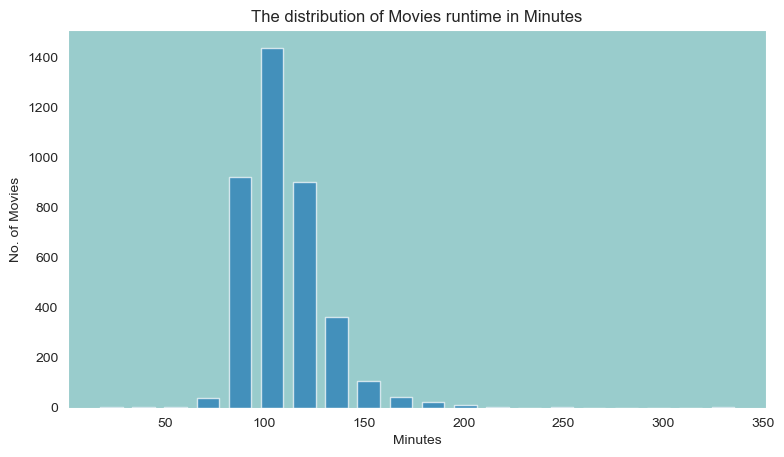

In [23]:
plot_hist('runtime', 'Minutes')

In [24]:
df_tmdb['runtime'].mean()

109.22029060716139

In [25]:
min_runtime_movie = df_tmdb[df_tmdb['runtime'] == df_tmdb['runtime'].min()]['original_title'].iloc[0]
print("The movie with the minimum runtime is: {}, and it's {} minutes long".format(min_runtime_movie,df_tmdb['runtime'].min()))


max_runtime_movie = df_tmdb[df_tmdb['runtime'] == df_tmdb['runtime'].max()]['original_title'].iloc[0]
print("The movie with the maximum runtime is: {}, and it's {} minutes long".format(max_runtime_movie,df_tmdb['runtime'].max()))

The movie with the minimum runtime is: Kid's Story, and it's 15.0 minutes long
The movie with the maximum runtime is: Carlos, and it's 338.0 minutes long


> As we can see from the plot, that lengths of movies are normally distributed with a very little skewness

> The mean is 109 minutes long (slightly less than 2 hours), and most of the movies lenght are around this value and this is the common range

> thought the `min` and `max` functions can tel lus that the movie length can fo down to be only `15 minutes`, and can go high to reach `338 minutes` That's more that `5 hours` and that quite high!

### Research Question 2 (What are the movies with the least and the most earned revenue, and how aften a movie can fail or succeed?)

**Why could this question be usefull?**
- Like any product, it needs a lot of factors to come togther to make a succesful movie, It's a hard industry and anyone production company should be prepared that as they can make a huge amount of money, it also can lose everything, So it's necessary to have an insight about how often a movie can succeed or fail, and that in the industry can be measured by the revenue a movie earned

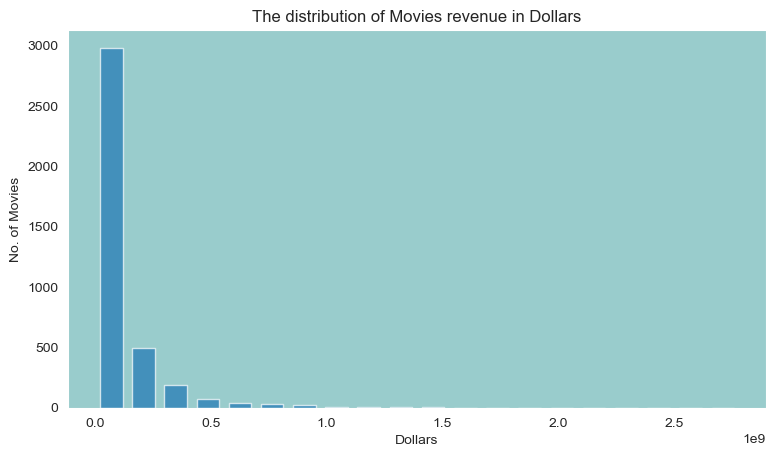

In [26]:
plot_hist('revenue', 'Dollars')

In [27]:
df_tmdb['revenue'].mean()

107686616.09807992

> That's very interesting! From this plot, and knowing that the mean revenue is about `1 million dollars` we can see that there is a huge difference between the amount of movies that earned a revenue bigger that the mean, and the movies earned revenue less that the mean, It's about `1 : 3` and that reinforce the idea we discussed the begging of answering this question, which say that there are a lot of factor that should came together to make a very succesful movie, so turns out that a movie is more likely to gain below average revenue than to gain above average

In [28]:
df_tmdb[df_tmdb['revenue'] < df_tmdb['revenue'].mean()].count()[0]

2747

In [29]:
df_tmdb[df_tmdb['revenue'] > df_tmdb['revenue'].mean()].count()[0]

1107

In [30]:
least_revenue_movie = df_tmdb[df_tmdb['revenue'] == df_tmdb['revenue'].min()]['original_title'].iloc[0]
print("The movie with the minimum revnue is: {}, and it earned {} dollars".format(least_revenue_movie, df_tmdb['revenue'].min()))


most_revenue_movie = df_tmdb[df_tmdb['revenue'] == df_tmdb['revenue'].max()]['original_title'].iloc[0]
print("The movie with the maximum revenue is: {}, and it earned {} dollars".format(most_revenue_movie, df_tmdb['revenue'].max()))

The movie with the minimum revnue is: Shattered Glass, and it earned 2.0 dollars
The movie with the maximum revenue is: Avatar, and it earned 2781505847.0 dollars


### Research Question 3 (What kinds of properties are associated with movies that have high revenues?)

**Why could this question be usefull?**
- As we discussed in the prevous question, A movie is like any product, it needs a lot of factors to come togther to make a succesful movie, It's a hard industry and anyone production company should be prepared that as they can make a huge amount of money, it also can lose everything. Answering question is a very important because it will give us a wider and a more informative idea of all the factors that affect a profitable movie.



> To answer this questions I am going to search for a relationship between every attribute may affect the revnue with the earned revenue

> The attributes will be checked are: budget, popularity, release_year, runtime, vote_average

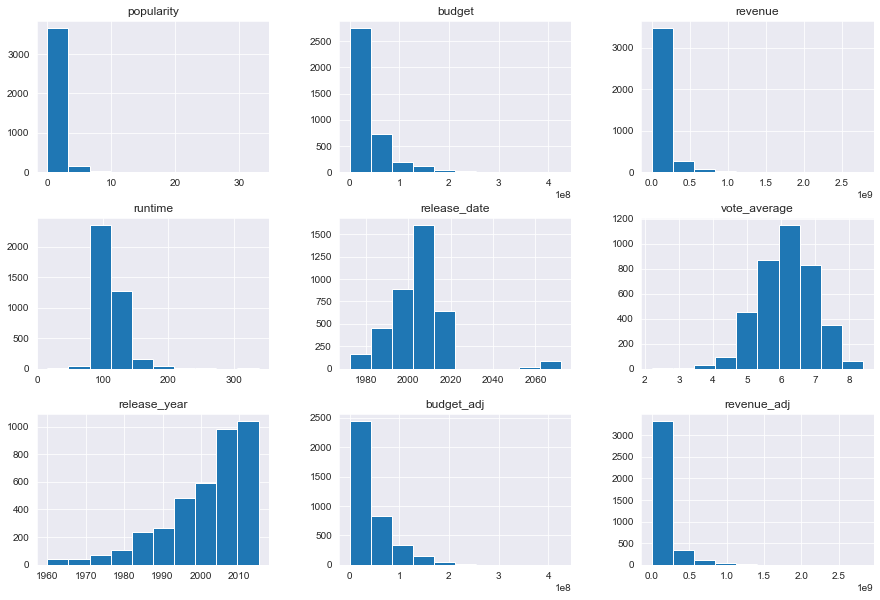

In [31]:
df_tmdb.hist(figsize=(15,10));

> A good way of visualizing the relationship between the earned revenue and different properties is a scatter plots between the revenue and each property alone, to have more clear understanding of the different effect that the different properties make on the revenue.

> So, I am going to make a scatter plot between each oen of them with the revenue

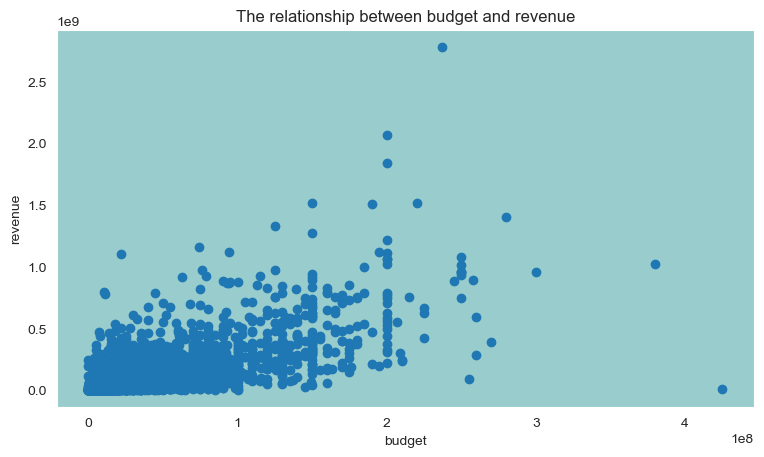

In [32]:
# plotting the relationship between budget and revenue
plot_scatter('budget', 'revenue')

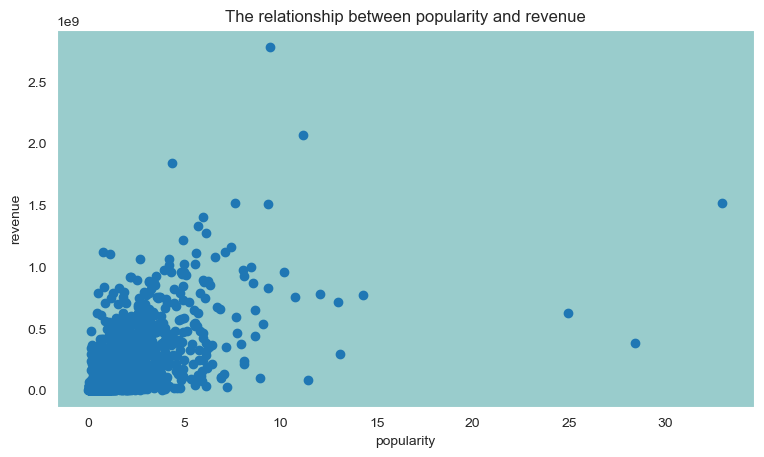

In [33]:
# plotting the relationship between popularity and revenue
plot_scatter('popularity', 'revenue')

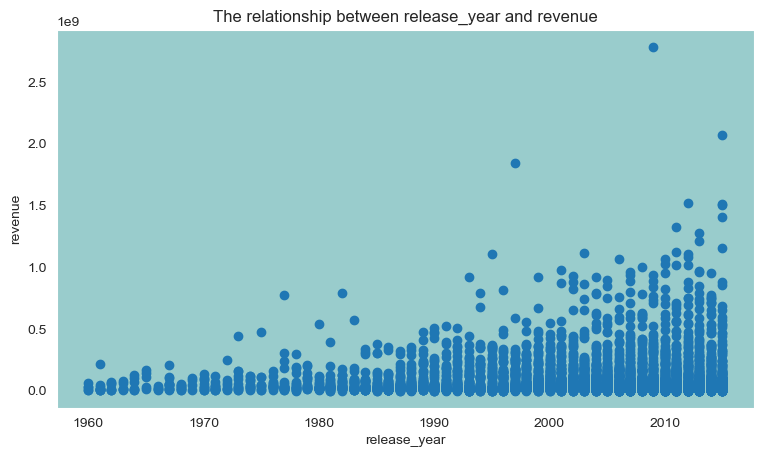

In [34]:
# plotting the relationship between release_year and revenue
plot_scatter('release_year', 'revenue')

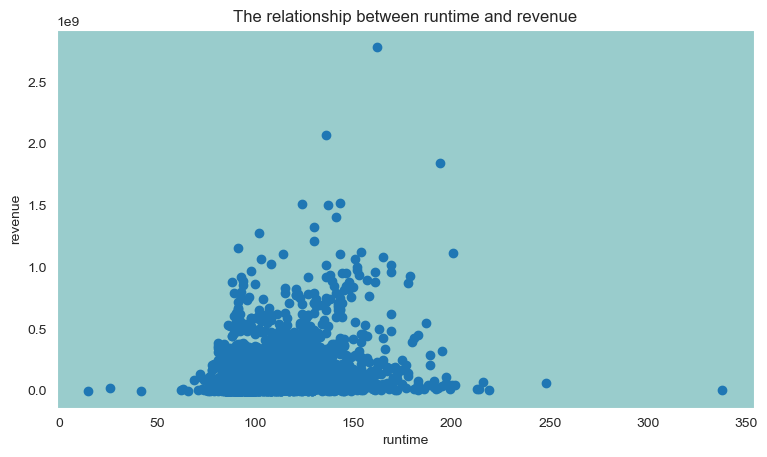

In [35]:
# plotting the relationship between runtime and revenue
plot_scatter('runtime', 'revenue')

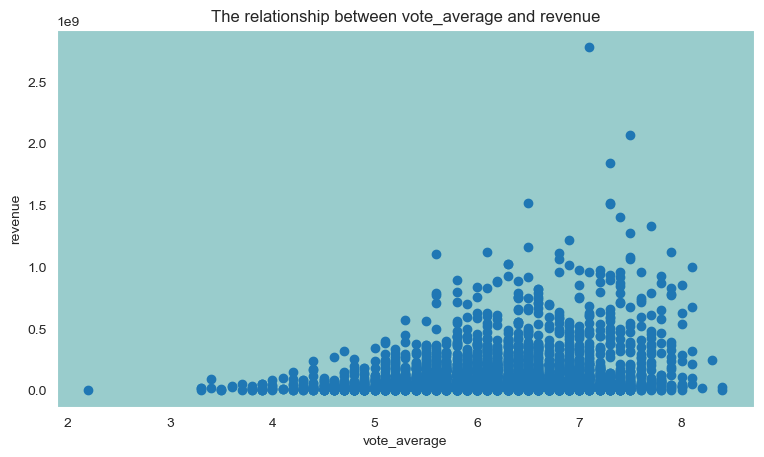

In [36]:
# plotting the relationship between average vote and revenue
plot_scatter('vote_average', 'revenue')

> From interpreting the prevous figures, we see that the properties that most assiciated with a higher revenue are because when we look at them, the more higher the value of a property goes (the dots goes to the right of the x column), the higher the revenue is, and this describe a correlation and this correlation seems from the figures to be higher with these 4 properties, so they are the most effective properties.

>  `release_year`, `vote_avearge`, `popularity`, and `budget` 

### Research Question 4 (How did the amount of produced films changed over time?)

**Why could this question be usefull?**
- The movies industry is one of the most popular industries nowdays, Because of the huge advance that happened in the technology, and because in today's modern society, media has become a very big parts of our life. to reinforce that idea with numbers and to to have a detailed overview of how this industry has grown. The answer of this question would be a good reference to any nresearcher or productions company the know the size of movies business.

> The dataset has a column for the release year, we can plot a histogram display the number of movies per every year

> first, let's show some descriptive statistics about this attribut

In [37]:
df_tmdb['release_year'].min()

1960

In [38]:
df_tmdb['release_year'].max()

2015

In [39]:
df_tmdb.describe()['release_year']

count    3854.000000
mean     2001.261028
std        11.282575
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

> The first movie in the dataset was released in `1960` and the last one on it released in `2015`

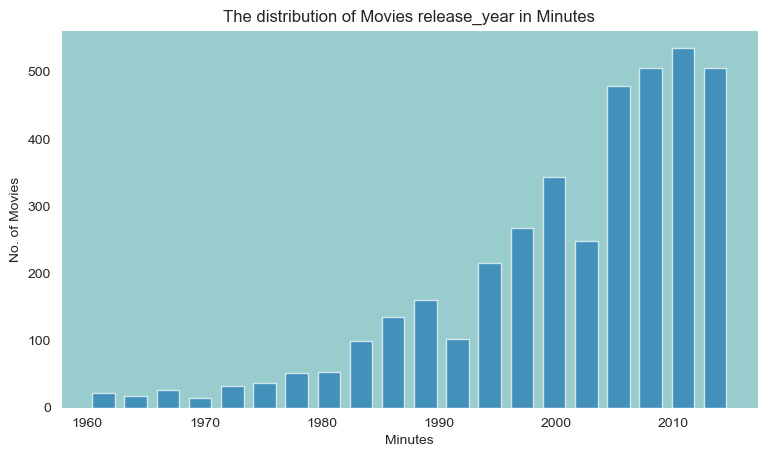

In [40]:
plot_hist('release_year', 'Minutes')

> The plot started to get high in early years

> It's clear that the amount of produced movies increased year by year 

> To show this conclusion with more details, let's see the number of produced movies at different years

In [41]:
# quering the dataframe where the release year is 1980
# and since we're counting we can take the count of any column that does not have null value
df_tmdb.query('release_year == 1980').count()[0]

23

In [42]:
df_tmdb.query('release_year == 1990').count()[0]

53

In [43]:
df_tmdb.query('release_year == 2000').count()[0]

106

In [44]:
df_tmdb.query('release_year == 2010').count()[0]

178

> As we see the number of movies between `1980` and `2010` increased from `23` to `178`

<a id='conclusions'></a>
## Conclusions

1. The result of analysis to answer the first questions which is `What are the movies with the longest and shortest runtime?` has shown that The movie with the minimum runtime is `Kid's Story` and it's `15.0 minutes` long. and The movie with the maximum runtime is `Carlos` and it's `338.0 minutes` long.


2. The result of analysis to answer the second question which is `What are the movies with the least and the most earned revenue, and how aften a movie can fail or succeed?` has shown that The movie with the minimum revnue is `Shattered Glass` and it earned `2.0 dollars` The movie with the maximum revenue is `Avatar` and it earned `2781505847.0 dollars`, and the most important result that there are a lot of factor that should came together to make a very succesful movie, so turns out that a movie is more likely to gain below average revenue than to gain above average
 
 
3. The result of analysis to answer the third question which is `What kinds of properties are associated with movies that have high revenues?` shown that the properties that most assiciated with a higher revenue are `release_year`, `vote_avearge`, `popularity`, and `budget`. and that result acually wasn't very surprising because it makes sense that the movie that the production company spent more on it's budget will have bigger chance to make higher revenue because of the more available resources and the actors they can hire, also the movie that is more popular clearly should earn more revenue because it's widly spread


4. The result of analisys to answer the forth question which is `How did the amount of produced films changed over time?` was the most interesting!, It shows that the amount of movies produced over the years has increased insanely, it went from `23` to `178` and that's a big difference!.


### Limitations
> The limitation that I faced was that a big portion of the dataset rows had a 0-value that I had to drop them which made the size of the dataset decreaed. It had more than 10,000 records and the analysis done on less than 4,000 records
